독립 표본 t검정의 경우 집단의 정규성에 따라 접근방식이 다르다  
정규성 검정은 shapiro , anderson(샘플 5000개 이상) 을 통해 확인  
  
      
- 데이터가 정규성을 가지는 경우(모수적 검정)  
두 집단의 등분산 검정을 한 후  
from scipy.stats import ttest_ind  
  
- 등분산일 경우  
![등분산0](https://github.com/SudalHaeng/BigData-Analyst-Certificate/blob/main/img/img01.JPG?raw=true)
  
- 등분산이 아닐 경우  
![등분산X](https://github.com/SudalHaeng/BigData-Analyst-Certificate/blob/main/img/img02.JPG?raw=true)
  
데이터가 정규성을 가지지 않는 경우 (비모수적 검정)  

### Question

#### 두 개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라

In [1]:
import pandas as pd 

df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')

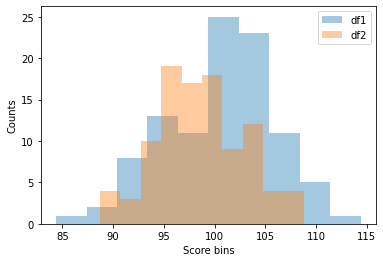

In [2]:
import matplotlib.pyplot as plt

plt.hist(df1,label='df1',alpha=0.4)
plt.hist(df2,label="df2",alpha=0.4)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [4]:
from scipy.stats import shapiro
print(shapiro(df1).pvalue)
print(shapiro(df2).pvalue)

0.37968069314956665
0.6793646216392517


### Shapiro 검정 결과
#### 두 그룹 모두 귀무가설을 기각하지 못한다.
#### 따라서 두 그룹 모두 정규성을 가진다.

### Question

#### 두 개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라

In [2]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0
...,...,...
295,80,NaN
296,30,NaN
297,91,NaN
298,84,NaN


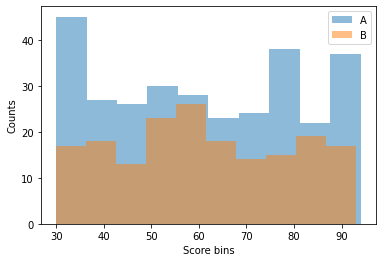

In [3]:
import matplotlib.pyplot as plt

plt.hist(df['A'],alpha=0.5,label='A')
plt.hist(df['B'].dropna(),alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [4]:
from scipy.stats import shapiro

print(shapiro(df['B'].dropna()))
print(shapiro(df['A']))

ShapiroResult(statistic=0.9639440774917603, pvalue=0.00013570845476351678)
ShapiroResult(statistic=0.93753981590271, pvalue=6.175894240456614e-10)


#### 두 그룹 모두 Shapiro검정 결과 귀무가설(정규성을 가진다)을 기각한다.
#### 정규성을 위배한다. 그러므로 비모수 검정을 실시해야한다.

In [5]:
from scipy.stats import mannwhitneyu , ranksums

print(mannwhitneyu(df['A'],df['B'].dropna()))
print(ranksums(df['A'],df['B'].dropna()))

MannwhitneyuResult(statistic=26964.0, pvalue=0.4903729188075009)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)


#### Mann-Whitney U Test 검정 결과 pvalue는 0.49값으로 귀무가설("평균은 같다")를 기각 할 수 없다.
#### 두 그룹의 평균은 동일하다 말할 수 있다. 
#### 윌콕슨 순위합 검정(ranksums)으로 확인 해봐도 같은 결과가 나온다.

### Question

#### 두 개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라

In [8]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')
df

,group,data
0,a,108.065847
1,a,88.714106
2,a,61.182748
3,a,51.763444
4,a,127.858730
...,...,...
185,b,100.192985
186,b,112.081790
187,b,83.148014
188,b,147.504761


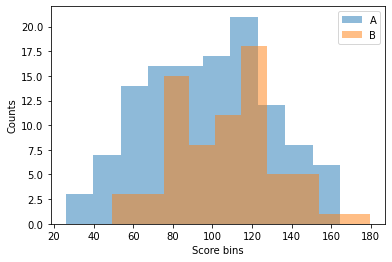

In [7]:
import matplotlib.pyplot as plt

plt.hist(df[df['group'] =='a'].data,label='A',alpha=0.5)
plt.hist(df[df['group'] =='b'].data,label="B",alpha=0.5)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [9]:
a = df[df['group'] =='a'].data
b = df[df['group'] =='b'].data


from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))

ShapiroResult(statistic=0.9834123253822327, pvalue=0.1473984718322754)
ShapiroResult(statistic=0.9831849336624146, pvalue=0.47018250823020935)


#### 두 그룹 모두 Shapiro검정 결과 귀무가설(정규성을 가진다)을 기각 하지 못한다.
#### 두 그룹은 정규성을 가진다.

In [10]:
from scipy.stats import levene

print(levene(a,b))

LeveneResult(statistic=6.185601018015722, pvalue=0.013750484571911342)


#### 두 그룹은 levene 검정을 확인해 본결과 pvalue 는 0.013로 귀무가실을 기각하고 대립가설을 채택한다. 두 그룹은 등분산이 아니다

In [12]:
from scipy.stats import ttest_ind

print(ttest_ind(a,b,equal_var=False))

Ttest_indResult(statistic=-2.1949470315829265, pvalue=0.029512802991767915)


#### 등분산이 아니기 때문에 equal_var=False 파라미터를 주고 ttest_ind 모듈을 이용하여 t test를 진행한다
#### pvalue는 0.02이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하고 대립가설을 채택한다
#### 결론적으로 두 그룹은 모두 정규성을 가지지만 등분산은 아니며 평균은 동일하다고 보기 어렵다

### Question

#### 두 개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라

In [13]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')
df

,a,b
0,121.023118,69.982090
1,69.740978,139.774624
2,93.737693,175.425924
3,100.331645,85.493555
4,75.048925,83.488953
...,...,...
115,97.955501,NaN
116,116.839209,NaN
117,88.257448,NaN
118,89.904714,NaN


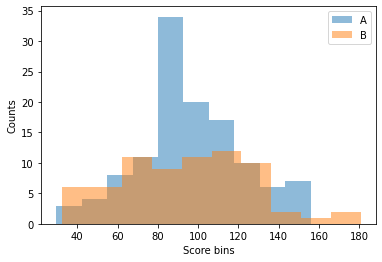

In [14]:
import matplotlib.pyplot as plt

plt.hist(df['a'],alpha=0.5,label='A')
plt.hist(df['b'],alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [15]:
a = df['a'].dropna()
b = df['b'].dropna()

from scipy.stats import shapiro

print(shapiro(a))
print(shapiro(b))

ShapiroResult(statistic=0.9865895509719849, pvalue=0.28390026092529297)
ShapiroResult(statistic=0.9854325652122498, pvalue=0.5937552452087402)


#### 두 그룹 모두 Shapiro검정 결과 귀무가설(정규성을 가진다)을 기각 하지 못한다. 
#### 두 그룹은 정규성을 가진다.

In [16]:
from scipy.stats import levene

print(levene(a,b))

LeveneResult(statistic=3.9862856894158347, pvalue=0.04731495612868527)


#### 두 그룹은 levene 검정을 확인해 본결과 pvalue 는 0.047로 귀무가실을 기각하고 대립가설을 채택한다.
#### 두 그룹은 등분산이 아니다

In [17]:
from scipy.stats import ttest_ind

print(ttest_ind(a,b,equal_var=False))


Ttest_indResult(statistic=0.0015963310698567188, pvalue=0.9987289046092704)


#### 등분산이 아니기 때문에 equal_var=False 파라미터를 주고 ttest_ind 모듈을 이용하여 t test를 진행한다
#### pvalue는 0.99이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하기 어렵다
#### 결론적으로 두 그룹은 모두 정규성을 가지지만 등분산은 아니며 평균은 동일하다고 볼 수 있다